Welcome to Rev Data Analysis

1.press 1 to view  data in dataset 
2.press 2 to view data in a given range 
3.press 3 to view a specific customer  
4.press 4 for tracking credit card scores  
5.press 5 for tracking balance of customers 
6.press 6 for tracking estimated salary of customers  
7.press 7 to view customers eligible for credit cards   
8.press 8 to view the list of potential defaulters 
9.press 9 to view potential customers  for silver credit cards
10.press 10 to view potential customers  for gold  credit cards
11.press 11 to view potential customers  for platinum credit cards
12.press 12 to view potential customer according to region 
13.press 13 to view plotting of  dataset 
14.Exit

select your option  : 13
 press 1  to View chart for customare eligible for creditcard 
press 2 to view chart for potentialcreditcarddefaulters 
press 3 to view chart for eligible silver card customers 
press 4 to view chart for eligible gold card customers
press 5 to view chart for eligible pl

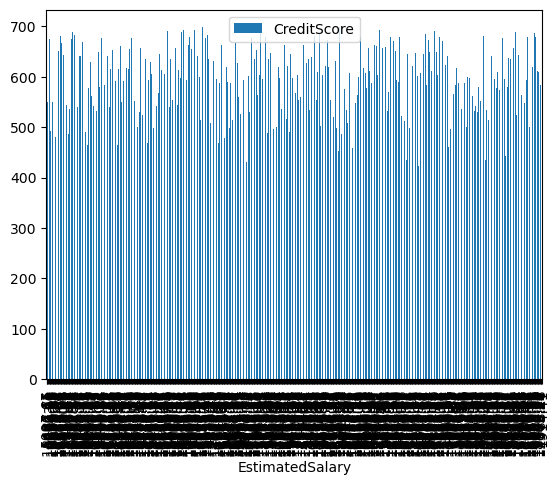

In [3]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *
import matplotlib as p 
import seaborn as s 


df1 = spark.read.csv("C:\\Users\\ANAND\\Desktop\\p1code\\PROJECT2-main\\DATASETS\\credit card.csv", inferSchema = True , header = True)
def mainmenu():
    print('Welcome to Rev Data Analysis')
    choice = 0
    while True :
       
        print()
        print('1.press 1 to view  data in dataset ')
        print("2.press 2 to view data in a given range ")
        print('3.press 3 to view a specific customer  ')
        print('4.press 4 for tracking credit card scores  ')
        print('5.press 5 for tracking balance of customers ')
        print('6.press 6 for tracking estimated salary of customers  ')
        print("7.press 7 to view customers eligible for credit cards   ")
        print("8.press 8 to view the list of potential defaulters ")
        print("9.press 9 to view potential customers  for silver credit cards")
        print("10.press 10 to view potential customers  for gold  credit cards")
        print("11.press 11 to view potential customers  for platinum credit cards")
        print("12.press 12 to view potential customer according to region ")
        print("13.press 13 to view plotting of  dataset ")
        print('14.Exit')
        print()
        
        choice = int(input('select your option  : '))
        
        if choice == 1:
            showalldata()
        elif choice == 2:
            rangedataview()
        elif choice == 3:
            viewspecificcustomer()
        elif choice == 4:
            creditscoretracker()
        elif choice == 5:
            balancetracker()
        elif choice == 6:
             estimatedsalarytracker()
        elif choice == 7:
            customereligibleforcreditcard()
        elif choice == 8 :
            potentialcreditcarddefaulters()
        elif choice == 9 :
            silvercreditcard()
        elif choice == 10:
            goldcreditcard()
        elif choice == 11 :
            platinumcreditcard()
        elif choice == 12:
            regioneligiblecustomers()
        elif choice == 13 :
            plotting()
        elif choice == 14 :
            print("Thank you for using Rev analysis ")
            break
        elif choice == 14 :
            break
            
        else:
            print('Invalid Option !!!')
            print('Please Select A Valid Option')
            print()
            input('Press Enter To Continue...')
            
def showalldata():
              print("Number of Customers in Dataset " , df1.count())
              while True :
                inp = int(input("Plaese enter the number of Customer you want to view from above count "))
                if inp <= df1.count() :
                    df1.show(inp)
                    break
                else :
                    print("Please enter the number from the above count ")
def rangedataview() :
        print("Number of Customers in Dataset " , df1.count())
        while True :
            inp1 = int(input("Enter number from where you want to start viewing the data "))
            inp2 = int(input("Enter number till where you want to view the data "))
            op = inp2 - inp1
            if inp1 >= 1 and inp2 <= df1.count() :
                df1.select("RowNumber" ,"CustomerId" ,"Age" , "Balance" , "EstimatedSalary" , "IsActiveMember" ,"Geography").filter((df1["RowNumber"] >= inp1) & (df1["RowNumber"] <= inp2)).show(op)
                break
            else :
                print("Please enter in the avialable range ")
def viewspecificcustomer() :
             inp = int(input("Enter customer id to view customer "))
             df1.select("CustomerId", "Age", "Geography", "Balance", "EstimatedSalary","IsActiveMember").filter(df1.CustomerId==inp).show()

def creditscoretracker() :
           a = df1.groupby().max('CreditScore').first().asDict()['max(CreditScore)']
           b = df1.groupby().min('CreditScore').first().asDict()['min(CreditScore)']
           print("minimum credit score : " , b)
           print("maximum credit score : " , a)
           while True :
               inp = int(input("please enter a number to check customers credit score from a given above range "))
               if inp <= a or inp >= b :
                  if inp >= 350 and inp <= 499 :
                        print("Number of customers in the range of 350 to 499  ",df1.filter((df1["CreditScore"] >= 350) & (df1["CreditScore"] <= 499)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["CreditScore"] >= 350) & (df1["CreditScore"] <= 499)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["CreditScore"] >= 350) & (df1["CreditScore"] <= 499)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE  OF ABOVE THE CUSTOMERS COUNT   ")
                        break
                  elif  inp >= 500 and inp <= 699 :
                        print("Number of customers in the range of 500 to 699 " ,df1.filter((df1["CreditScore"] >= 500) & (df1["CreditScore"] <= 699)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["CreditScore"] >= 500) & (df1["CreditScore"] <= 699)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["CreditScore"] >= 500) & (df1["CreditScore"] <= 699)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE OF 500 TO 700 ")
                        break
                  elif  inp >= 700 and inp <= 850 :
                        print("Number of customers in the range of 700 to 850 " ,df1.filter((df1["CreditScore"] >= 700) & (df1["CreditScore"] <= 850)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["CreditScore"] >= 700) & (df1["CreditScore"] <= 850)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["CreditScore"] >= 700) & (df1["CreditScore"] <= 850)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE OF FROM THE ABOVE CUSTOMER COUNT  ")
                        break
                  break
               else :
                  print("please enter from 350 to 850 ")
                    
def balancetracker() :
             a = df1.groupby().max('Balance').first().asDict()['max(Balance)']
             b = df1.groupby().min('Balance').first().asDict()['min(Balance)'] 
             print("Maximum Balance  : " , a)
             print("Minimum Balance  : " , b)
             while True :
                    inp = int(input("please enter the balance of customers to view "))
                    if inp <= a and inp >= b :
                     if inp >= 0 and inp <= 49999 :
                        print("Number of customers in the range of 0 to 49999  ",df1.filter((df1["Balance"] >= 0) & (df1["Balance"] <= 49999)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["Balance"] >= 0) & (df1["Balance"] <= 49999)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["Balance"] >= 0) & (df1["Balance"] <= 49999)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE  OF ABOVE THE CUSTOMERS COUNT   ")
                        break
                     elif  inp >= 50000 and inp <= 99999 :
                        print("Number of customers in the range of 50000 to 99999 " ,df1.filter((df1["Balance"] >= 50000) & (df1["Balance"] <= 99999)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["Balance"] >= 50000) & (df1["Balance"] <= 99999)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["Balance"] >= 50000) & (df1["Balance"] <= 99999)).show(inp)
                               break
                            else :
                                print(" OOPS ! PLEASE SELECT FROM RANGE  OF ABOVE THE CUSTOMERS COUNT ")
                        break
                     elif  inp >= 100000 and inp <= 199999 :
                        print("Number of customers in the range of 100000 to 199999 " ,df1.filter((df1["Balance"] >= 100000) & (df1["Balance"] <= 199999)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["Balance"] >= 100000 ) & (df1["Balance"] <= 199999)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["Balance"] >= 100000 ) & (df1["Balance"] <= 199999)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE OF FROM THE ABOVE CUSTOMER COUNT  ")
                        break
                     elif  inp >= 200000 and inp <= 250000 :
                        print("Number of customers in the range of 200000 to 250000 " ,df1.filter((df1["Balance"] >= 200000) & (df1["Balance"] <= 250000)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["Balance"] >= 200000 ) & (df1["Balance"] <= 250000)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["Balance"] >= 200000 ) & (df1["Balance"] <= 250000)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE OF FROM THE ABOVE CUSTOMER COUNT  ")
                        break  
                     break
                    else :
                        print("please enter from 0 to 250000 ")
def estimatedsalarytracker() :
           a = df1.groupby().max('EstimatedSalary').first().asDict()['max(EstimatedSalary)']
           b = df1.groupby().min('EstimatedSalary').first().asDict()['min(EstimatedSalary)']
           print("Maximum Estimated Salary  : " , a)
           print("Minimum Estimated Salary : " , b)
           while True :
               inp = int(input("please enter a number to check customers Estimated salary from a given above range "))
               if inp <= a or inp >= b :
                  if inp >= 0 and inp <= 49999 :
                        print("Number of customers in the range of 0 to 49999  ",df1.filter((df1["EstimatedSalary"] >= 0) & (df1["EstimatedSalary"] <= 49999)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["EstimatedSalary"] >= 0) & (df1["EstimatedSalary"] <= 49999)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["EstimatedSalary"] >= 0) & (df1["EstimatedSalary"] <= 49999)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE  OF ABOVE THE CUSTOMERS COUNT   ")
                        break
                  elif  inp >= 50000 and inp <= 99999 :
                        print("Number of customers in the range of 500 to 699 " ,df1.filter((df1["EstimatedSalary"] >= 50000) & (df1["EstimatedSalary"] <= 99999)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["EstimatedSalary"] >= 50000) & (df1["EstimatedSalary"] <= 99999)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["EstimatedSalary"] >= 50000) & (df1["EstimatedSalary"] <= 99999)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE OF FROM THE ABOVE CUSTOMER COUNT ")
                        break
                  elif  inp >= 100000 and inp <= 149999 :
                        print("Number of customers in the range of 500 to 700 " ,df1.filter((df1["EstimatedSalary"] >= 100000) & (df1["EstimatedSalary"] <= 149999)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["EstimatedSalary"] >= 100000) & (df1["EstimatedSalary"] <= 149999)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["EstimatedSalary"] >= 100000) & (df1["EstimatedSalary"] <= 149999)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE OF FROM THE ABOVE CUSTOMER COUNT  ")
                        break
                  elif  inp >= 150000 and inp <= 200000 :
                        print("Number of customers in the range of 500 to 700 " ,df1.filter((df1["EstimatedSalary"] >= 150000) & (df1["EstimatedSalary"] <= 200000)).count())
                        while True :
                            inp = int(input("please enter the customers from the above count "))
                            if inp <= df1.filter((df1["EstimatedSalary"] >= 150000) & (df1["EstimatedSalary"] <= 200000)).count() :
                               df1.select("CustomerId" , "Balance" ,"Geography" , "EstimatedSalary").filter((df1["EstimatedSalary"] >= 150000) & (df1["EstimatedSalary"] <= 200000)).show(inp)
                               break
                            else :
                                print("OOPS ! PLEASE SELECT FROM RANGE OF FROM THE ABOVE CUSTOMER COUNT  ")
                        break  
                  break
               else :
                  print("please enter from 0 to 200000 ")
                    
       
    
def customereligibleforcreditcard() :
    print("Number of customers eligible for credit card : " , df1.filter((df1["CreditScore"]>700) & (df1["Balance"] > 20000) & (df1["EstimatedSalary"] > 20000)).count())
    while True :
          inp = int(input("Please enter how many customers you want to view "))
          if inp <= df1.filter((df1["CreditScore"]>700) & (df1["Balance"] > 20000) & (df1["EstimatedSalary"] > 20000)).count() :
            df1.select("CustomerId" , "Balance" , "EstimatedSalary" , "Geography","IsActiveMember").filter((df1["CreditScore"]>700) & (df1["Balance"] > 20000) & (df1["EstimatedSalary"] > 20000)).show(inp)
            break
          else :
            print("Please enter from the above available range  ")
            
    
def potentialcreditcarddefaulters() :
    print("Number of potential credit card defaulters : " , df1.filter((df1["CreditScore"] < 700) &  (df1["EstimatedSalary"] < 20000) ).count())
    while True :
        inp = int(input("Please enter number of potential defaulters you want to view from the above count "))
        if inp <= df1.filter((df1["CreditScore"] < 700) &  (df1["EstimatedSalary"] < 20000) ).count() :
            df1.select("CustomerId" , "Balance" , "EstimatedSalary" , "Geography" , "IsActiveMember").filter((df1["CreditScore"] < 700) &  (df1["EstimatedSalary"] < 20000)).show(inp)
            break
        else : 
            print("Please select from the above range ")

def silvercreditcard() :
    print("Number of Potential silver  customers : " , df1.select("CustomerId" , "Balance" , "EstimatedSalary","Age").filter((df1["Balance"] > 25000) & (df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 25000) & (df1["IsActiveMember"] == 1)).count())
    while True :
      inp = int(input("Please enter the number of potential customers from the above range"))
      if inp <= df1.filter((df1["Balance"] > 25000) & (df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 25000) & (df1["IsActiveMember"] == 1)).count() :
        df1.select("CustomerId" , "Balance" , "EstimatedSalary","Age").filter((df1["Balance"] > 25000) & (df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 25000) & (df1["IsActiveMember"] == 1)).show(inp)
        break
      else  :
        print("please enter number in range from above ! Thank you ")
def goldcreditcard() :
     print("Number of Potential gold  customers : " , df1.select("CustomerId" , "Balance" , "EstimatedSalary","Age").filter((df1["Balance"] > 50000) & (df1["CreditScore"] > 750) & (df1["EstimatedSalary"] > 50000) & (df1["IsActiveMember"] == 1)).count())
     while True :
      inp = int(input("Please enter the number of potential silver customers from the above range"))
      if inp <= df1.filter((df1["Balance"] > 50000) & (df1["CreditScore"] > 750) & (df1["EstimatedSalary"] > 50000) & (df1["IsActiveMember"] == 1)).count() :
        df1.select("CustomerId" , "Balance" , "EstimatedSalary","Age").filter((df1["Balance"] > 50000) & (df1["CreditScore"] > 750) & (df1["EstimatedSalary"] > 50000) & (df1["IsActiveMember"] == 1)).show(inp)
        break
      else  :
        print("please enter number in range from above ! Thank you ")
def platinumcreditcard() :
    
       print("Number of Potential platinum  customers : " , df1.select("CustomerId" , "Balance" , "EstimatedSalary","Age").filter((df1["Balance"] > 100000) & (df1["CreditScore"] > 800) & (df1["EstimatedSalary"] > 100000) & (df1["IsActiveMember"] == 1)).count())
       while True :
         inp = int(input("Please enter the number of potential platinum  customers from the above range"))
         if inp <= df1.filter((df1["Balance"] > 100000) & (df1["CreditScore"] > 800) & (df1["EstimatedSalary"] > 100000) & (df1["IsActiveMember"] == 1)).count() :
           df1.select("CustomerId" , "Balance" , "EstimatedSalary","Age").filter((df1["Balance"] > 100000) & (df1["CreditScore"] > 800) & (df1["EstimatedSalary"] > 100000) & (df1["IsActiveMember"] == 1)).show(inp)
           break
         else  :
            print("please enter number in range from above ! Thank you ")
def regioneligiblecustomers() :
    ch = 0
    while True :
        print("please select the region wise eligible customers ")
        print("press 1 for spain ")
        print("press 2 for Germany ")
        print("press 3 for France ")
        
        ch = int(input("please select your region from the above : ")) 
        
        if ch == 1 :
            print("Eligible customers in spain " ,df1.filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "Spain")).count())
            inp = int(input("Enter number of customers you want to view : "))
            if inp <= df1.filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "Spain")).count() :
                df1.select("CustomerId" , "Balance","EstimatedSalary","Age").filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "Germany")).show(inp)
                break
            else :
                print("please enter from the range of available customers ")
        elif ch == 2 :
            print("Eligible customers in Germany " ,df1.filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "Germany")).count())
            inp = int(input("Enter number of customers you want to view : "))
            if inp <= df1.filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "Germany")).count() :
                df1.select("CustomerId" , "Balance" ,"EstimatedSalary" ,"Age").filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "Germany")).show(inp)
                break
            else :
                print("please enter from the range of available customers ")
        elif ch == 3 :
            print("Eligible customers in France " ,df1.filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "France")).count())
            inp = int(input("Enter number of customers you want to view : "))
            if inp <= df1.filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "France")).count() :
                df1.select("CustomerId" , "Balance","EstimatedSalary" , "Age").filter((df1["CreditScore"] > 700) & (df1["EstimatedSalary"] > 5000) & (df1["IsActiveMember"] == 1) & (df1['Geography'] == "France")).show(inp)
                break
            else :
                print("please enter from the range of available customers ")
            
        else :
            print("please select from 1 to 3")
            
            
        break
def plotting() :
     while True :
            print(" press 1  to View chart for customare eligible for creditcard ")
            print("press 2 to view chart for potentialcreditcarddefaulters ")
            print("press 3 to view chart for eligible silver card customers ")
            print("press 4 to view chart for eligible gold card customers")
            print("press 5 to view chart for eligible platinum card customers")
            ch = int(input("Enter a number to view charting "))
            
            if ch == 1 :
                a = df1.select(  "EstimatedSalary" , "CreditScore").filter((df1["CreditScore"]>700) & (df1["Balance"] > 20000) & (df1["EstimatedSalary"] > 20000)).toPandas()
                a.plot(x = "EstimatedSalary", y = "CreditScore" , kind = "bar" )
                break
            elif ch == 2 :
                b = df1.select(  "EstimatedSalary" ,  "CreditScore").filter((df1["CreditScore"] < 700) &  (df1["EstimatedSalary"] < 20000)).toPandas()
                b.plot(x = "EstimatedSalary" , y = "CreditScore" , kind = "bar")
                break
            else :
                break
            


            
        

mainmenu()